# Dylan Saunders

## Research question/interests

- #### What affect does the goverments economic system and practices have on the nations economic stability and consistancy?
- #### How much inflation changes over time and if countries show similar trends or if every country tends to run on their own cycle?
- #### What is the difference in CPI changes between energy, food, and the total cpi. 
- Inflation and CPI is said to change the world economy and potentially all of society, if that is the case I hope to learn as much as possible about it. 
- Learning to use dataset with finances will assist my future career developement of potentially working in the data analytics field for a finacial firm. 


## Analysis pipeline
- Load data
1. load data using a relative path  
- Clean data 
- change data type of time column to integer
1. drop columns Frequency and Flag Codes since their values are not necessary with our calculations
2. drop rows that have Q1, Q2, Q3, and Q4 to make data more simple and easier to work with
3. no columns remaining have NaN values
- Process data 
1. seperate the data set into the three subjects of the remaining rows ENRG, TOT, and FOOD
2. create max, min, and mean columns for each country and split into each subject
3. split data into different countries or subject and countries based on what counries we want to compare
- Wrangle data 
1. The data set is already assembled in and organized and clear way and the only restructuring required was changing time data type to int 
2. This data set is highly compreshensive no other data sets have been required to merge together


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax
df = pd.read_csv('./../data/raw/Inflationdataset.csv')
print(df)


         LOCATION INDICATOR       SUBJECT  MEASURE FREQUENCY    TIME  \
0             AUS       CPI          ENRG   AGRWTH         A    1972   
1             AUS       CPI          ENRG   AGRWTH         A    1973   
2             AUS       CPI          ENRG   AGRWTH         A    1974   
3             AUS       CPI          ENRG   AGRWTH         A    1975   
4             AUS       CPI          ENRG   AGRWTH         A    1976   
...           ...       ...           ...      ...       ...     ...   
293465  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Aug-22   
293466  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Sep-22   
293467  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Oct-22   
293468  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Nov-22   
293469  EU27_2020       CPI  TOT_FOODENRG  IDX2015         M  Dec-22   

             Value Flag Codes  
0         4.910070        NaN  
1         3.762801        NaN  
2        13.173540        NaN  
3      

In [ ]:
dfclean=df.drop(columns=["Flag Codes", "FREQUENCY"])
#Flag codes is the only column with NaN is not important for our purpose, neither is Frequency
dfclean=dfclean.drop(dfclean.index[6075:293470])
df_time_int=pd.to_numeric(dfclean["TIME"])
dfclean["TIME"]=df_time_int
print(dfclean)


     LOCATION INDICATOR SUBJECT MEASURE  TIME      Value
0         AUS       CPI    ENRG  AGRWTH  1972   4.910070
1         AUS       CPI    ENRG  AGRWTH  1973   3.762801
2         AUS       CPI    ENRG  AGRWTH  1974  13.173540
3         AUS       CPI    ENRG  AGRWTH  1975  19.422470
4         AUS       CPI    ENRG  AGRWTH  1976   8.833195
...       ...       ...     ...     ...   ...        ...
6070     OECD       CPI     TOT  AGRWTH  2017   2.281483
6071     OECD       CPI     TOT  AGRWTH  2018   2.607160
6072     OECD       CPI     TOT  AGRWTH  2019   2.068702
6073     OECD       CPI     TOT  AGRWTH  2020   1.370630
6074     OECD       CPI     TOT  AGRWTH  2021   3.992894

[6075 rows x 6 columns]


In [ ]:
dfenergy=  dfclean.loc[dfclean['SUBJECT'] == "ENRG"]
dfenergy.reset_index(drop=True)
dffood=  dfclean.loc[dfclean['SUBJECT'] == "FOOD"]
dffood.reset_index(drop=True)
dftot=  dfclean.loc[dfclean['SUBJECT'] == "TOT"]
dftot.reset_index(drop=True)

,LOCATION,INDICATOR,SUBJECT,MEASURE,TIME,Value
0,AUS,CPI,TOT,AGRWTH,1950,8.695652
1,AUS,CPI,TOT,AGRWTH,1951,19.428570
2,AUS,CPI,TOT,AGRWTH,1952,17.224880
3,AUS,CPI,TOT,AGRWTH,1953,4.489796
4,AUS,CPI,TOT,AGRWTH,1954,1.562500
...,...,...,...,...,...,...
2408,OECD,CPI,TOT,AGRWTH,2017,2.281483
2409,OECD,CPI,TOT,AGRWTH,2018,2.607160
2410,OECD,CPI,TOT,AGRWTH,2019,2.068702
2411,OECD,CPI,TOT,AGRWTH,2020,1.370630


([<matplotlib.axis.XTick>,
  <matplotlib.axis.XTick>,
  <matplotlib.axis.XTick>,
  <matplotlib.axis.XTick>,
  <matplotlib.axis.XTick>,
  <matplotlib.axis.XTick>,
  <matplotlib.axis.XTick>],
 [Text(0, 0, '1961'),
  Text(11, 0, '1972'),
  Text(21, 0, '1982'),
  Text(31, 0, '1992'),
  Text(41, 0, '2002'),
  Text(51, 0, '2012'),
  Text(61, 0, '2022')])

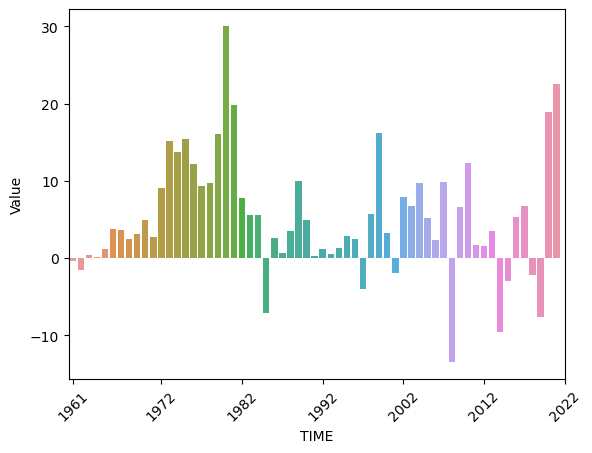

In [ ]:
df_enrg_CAN= dfenergy.loc[dfclean['LOCATION']=="CAN"]
df_enrg_CAN.reset_index()

CAN_sub_plot=sns.barplot(data=df_enrg_CAN, x=df_enrg_CAN['TIME'], y=df_enrg_CAN['Value'])
CAN_sub_plot.set_xticklabels(CAN_sub_plot.get_xticklabels(range(20)), rotation=45)
plt.xticks([0, 11, 21,31,41,51,61], ['1961','1972', '1982','1992','2002', '2012', '2022'])
#Canadas CPI of energy from 1961-2022

In [ ]:
df_max=dfclean.groupby(by=["LOCATION","SUBJECT"]).agg({"Value":["max", "min", "mean"]})
df_max.columns = [ 'max','min', 'mean']
df_max


max        min       mean
LOCATION SUBJECT                                
AUS      ENRG     27.23942  -7.186137   6.580013
         FOOD     15.35854  -3.697105   4.654477
         TOT      19.42857  -0.319489   4.903905
AUT      ENRG     39.24276 -11.665090   4.183044
         FOOD     10.74824  -1.722898   2.888177
...                    ...        ...        ...
USA      FOOD     16.29268  -2.397707   3.520026
         TOT      13.54920  -0.355546   3.668527
ZAF      ENRG     26.78758  -2.461501   9.582968
         FOOD     25.25466   1.201602  10.373790
         TOT      18.65492  -0.692031   7.596606

[116 rows x 3 columns]

<AxesSubplot:xlabel='Value', ylabel='LOCATION'>

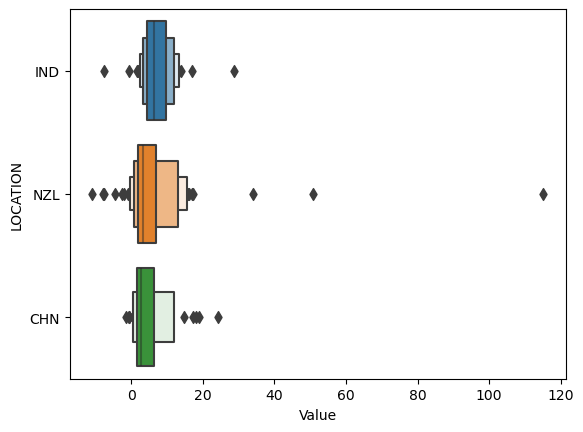

In [ ]:
df_tot_IND= dftot.loc[dfclean['LOCATION']=="IND"].reset_index(drop=True)
df_tot_NZL= dftot.loc[dfclean['LOCATION']=="NZL"].reset_index(drop=True)
df_tot_CHN= dftot.loc[dfclean['LOCATION']=="CHN"].reset_index(drop=True)
df_tot_comp= pd.concat([df_tot_IND, df_tot_NZL,df_tot_CHN], ignore_index=True).reset_index(drop=True)
sns.boxenplot(data=df_tot_comp, x="Value", y="LOCATION", scale="linear")
#this displays that in 3 countries with very different economic systems their CPI generally stays in the 
#same range. India is more socialist, New Zealand is more capitilist, China is more communist. 

<AxesSubplot:xlabel='TIME', ylabel='Value'>

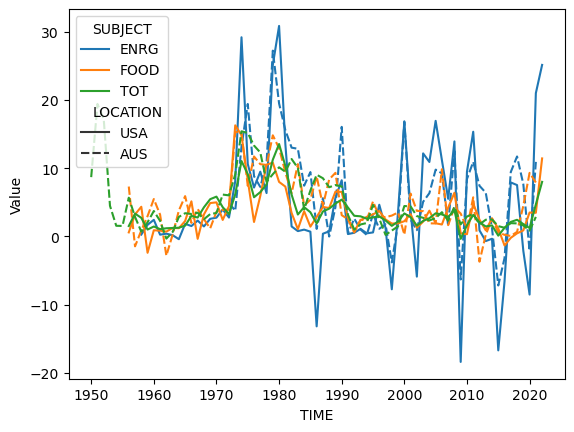

In [ ]:
df_USA= dfclean.loc[dfclean['LOCATION']=="USA"]
df_USA.reset_index()
df_AUS= dfclean.loc[dfclean['LOCATION']=="AUS"]
df_AUS.reset_index()
df_USA_AUS= pd.concat([df_USA, df_AUS], ignore_index=True)
sns.lineplot(data=df_USA_AUS, x= "TIME", y="Value",hue="SUBJECT", style="LOCATION")
